## Fast and Fun Computer Vision: Train Your Image Classification Model in Minutes

In this workshop, we will explore the [link text](https://)world of image classification using the fastai library for Python. Fastai is a powerful and user-friendly deep learning library built on top of PyTorch. It provides high-level abstractions and a simplified API, making it accessible even to those new to deep learning. With fastai, we can quickly build and train state-of-the-art neural networks for tasks like image classification, natural language processing, and more.

Throughout this workshop, we will walk through the process of building an image classifier using fastai and demonstrate its capabilities through practical examples. You can find more information about fastai and its documentation on the [official fastai library page](https://docs.fast.ai/).

Let's get started!


### Installations and imports

First of all, let's install the latest version of the library and import it

In [1]:
! [ -e /content ] && pip install -Uqq fastai

In [2]:
from fastai.vision.all import *

## The Dataset

We will be using the Oxford-IIIT Pet Dataset. It is a widely used dataset for image classification tasks, focusing on images of cats and dogs. It consists of a diverse collection of images featuring different breeds of cats and dogs. Each image in the dataset is labeled with the corresponding breed, allowing for supervised learning applications.

The dataset contains a total of **7,349** labeled images, covering **37** different cat breeds and **12** different dog breeds. The images in the dataset vary in terms of lighting conditions, poses, and backgrounds, making it suitable for training and evaluating image classification models.

To access and learn more about The Oxford-IIIT Pet Dataset, you can visit the following reference links:
- [The Oxford-IIIT Pet Dataset Official Website](https://www.robots.ox.ac.uk/~vgg/data/pets/)
- [The Oxford-IIIT Pet Dataset on Kaggle](https://www.kaggle.com/tanlikesmath/the-oxfordiiit-pet-dataset)



For the purpose of our workshop, we do not have to do extra work, as the library already contains functions that downloads and extracts the data for us!

The cells below are doing exactly that:


In [3]:
path = untar_data(url=URLs.PETS)

In [4]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [5]:
files = get_image_files(path/"images")
len(files)

7390

In [6]:
files[0],files[6]

(Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_132.jpg'),
 Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_77.jpg'))

After running the cells above, we have all the images downloaded and extracted to the path indicated above. We know that in the dataset, the cats are saved with the name of the file capitalized. If we check some of the files, we confirm this. Let's visualize these two images

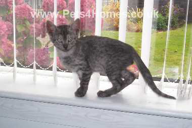

In [7]:
img1 = PILImage.create(files[0])
img1.to_thumb(192)

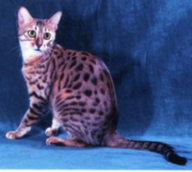

In [8]:
img2 = PILImage.create(files[6])
img2.to_thumb(192)

Since we know how to distinguish between the two labels that we are interested in classifying, we write the following function to do that for us:

In [9]:
def label_func(f):
  if f[0].isupper():
    return "cat"
  else:
    return "dog"

So now that we have the data prepared, let's move on to create our data loader. In fastai, an ImageDataLoaders object is a convenient class that helps in efficiently loading and preparing image datasets for training and validation in deep learning models. It abstracts away much of the boilerplate code involved in data preprocessing and augmentation.

In [10]:
dls = ImageDataLoaders.from_name_func(path, files, label_func, item_tfms=Resize(224))

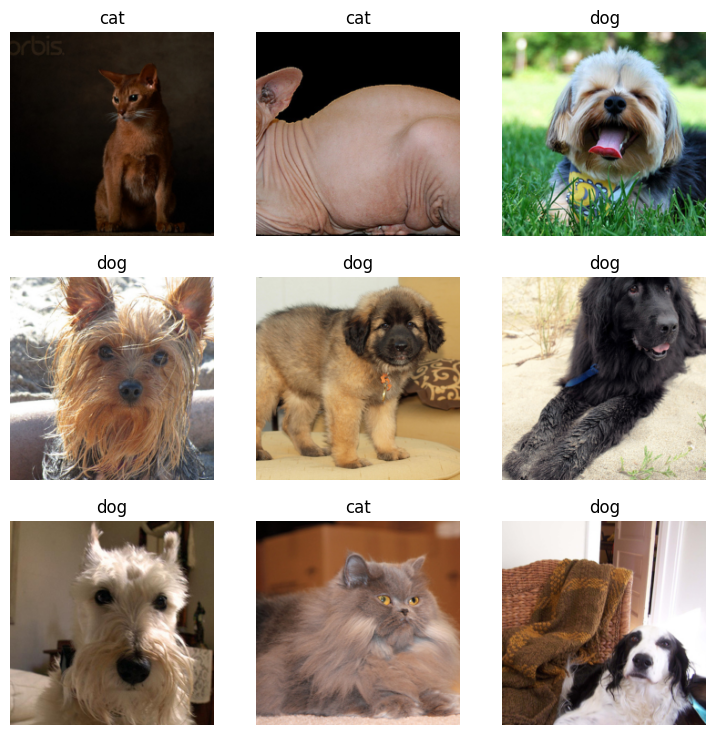

In [11]:
dls.show_batch()

In [12]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.135421,0.028669,0.010149,00:33


epoch,train_loss,valid_loss,error_rate,time
0,0.049750,0.010423,0.003383,00:35


And that was it! We have our model trained. It took only a few seconds, and we see that it achieves an error rate close to 0! With `show_results` we can already see how the model behaves.

Let's test it ourselves! We can upload a random photo of a cat or a dog and use the model to classify it.

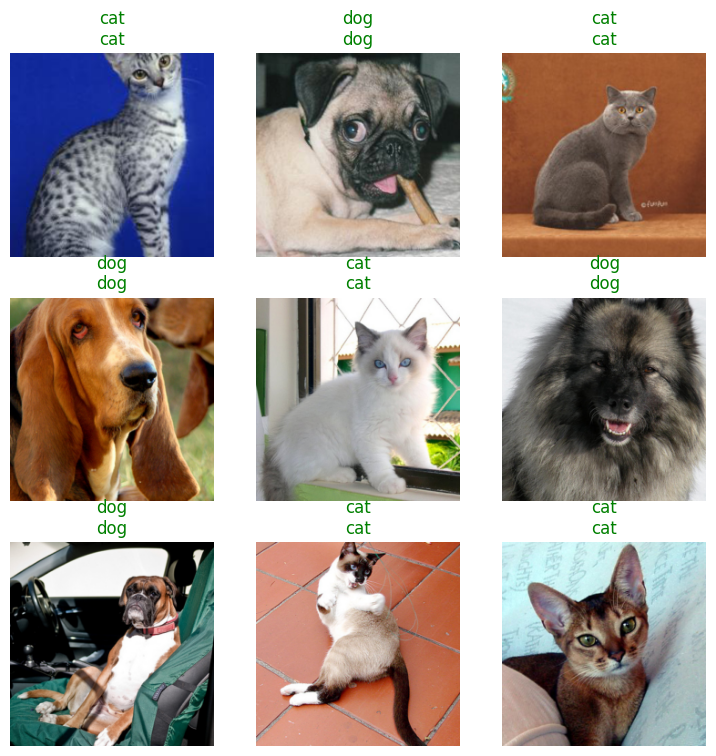

In [13]:
learn.show_results()

In [14]:
learn.predict('cat.jpeg')

('cat', tensor(0), tensor([1.0000e+00, 1.3242e-15]))

In [15]:
learn.predict('dog.jpg')

('dog', tensor(1), tensor([4.3032e-06, 1.0000e+00]))

# Export the model

Once we have a trained our model, and it achieves a performance that we are satisfied with, we can export to a pickle file. In the Inference.ipynb notebook, we can see how we can load our saved model and use it for performing the classification task.

In [16]:
learn.export('/content/cat_dog_model.pkl')

In [17]:
path = Path('/content')
path.ls(file_exts='.pkl')

(#1) [Path('/content/cat_dog_model.pkl')]